<a href="https://colab.research.google.com/github/Febipritiana/pertemuan6/blob/main/TB1_VISUALISASI_DATA_FEBI_PRITIANA_41822110003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

file_path = '/content/markets_cleaned.csv'
df = pd.read_csv(file_path)

print("Statistik Deskriptif:")
print(df.describe())

product_cols = df.columns[8:37]
product_counts = df[product_cols].sum().sort_values(ascending=False)

Statistik Deskriptif:
        Unnamed: 0          lat          lon  months_open   Bakedgoods  \
count  5343.000000  5339.000000  5339.000000  5343.000000  5343.000000   
mean   2671.000000   -89.888501    39.453910     6.376567     0.885458   
std    1542.535575    15.750410     4.483651     2.674895     0.318499   
min       0.000000  -124.416226    25.109214     1.000000     0.000000   
25%    1335.500000   -96.150590    36.857087     5.000000     1.000000   
50%    2671.000000   -85.701673    40.056583     6.000000     1.000000   
75%    4006.500000   -77.227226    42.517589     7.000000     1.000000   
max    5342.000000   -67.277359    48.943331    12.000000     1.000000   

             Beans       Cheese       Coffee       Crafts         Eggs  ...  \
count  5343.000000  5343.000000  5343.000000  5343.000000  5343.000000  ...   
mean      0.144862     0.492981     0.360659     0.627176     0.757440  ...   
std       0.351995     0.499998     0.480237     0.483601     0.428671  ..

<ipython-input-7-e94d123c502c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values[:10], y=product_counts.index[:10], palette="viridis")


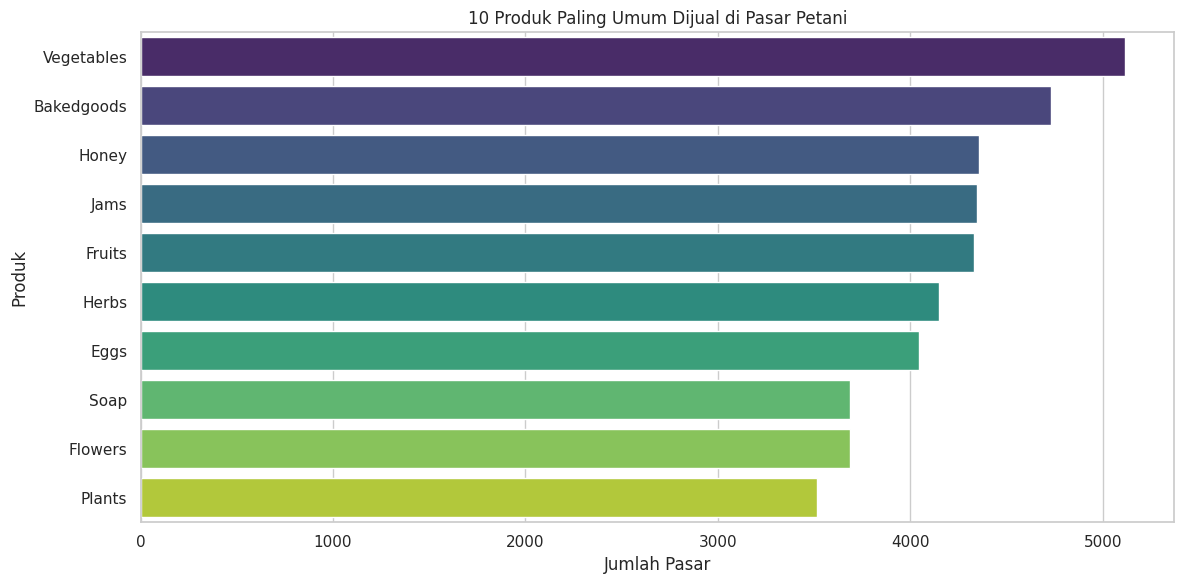

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values[:10], y=product_counts.index[:10], palette="viridis")
plt.title('10 Produk Paling Umum Dijual di Pasar Petani')
plt.xlabel('Jumlah Pasar')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()


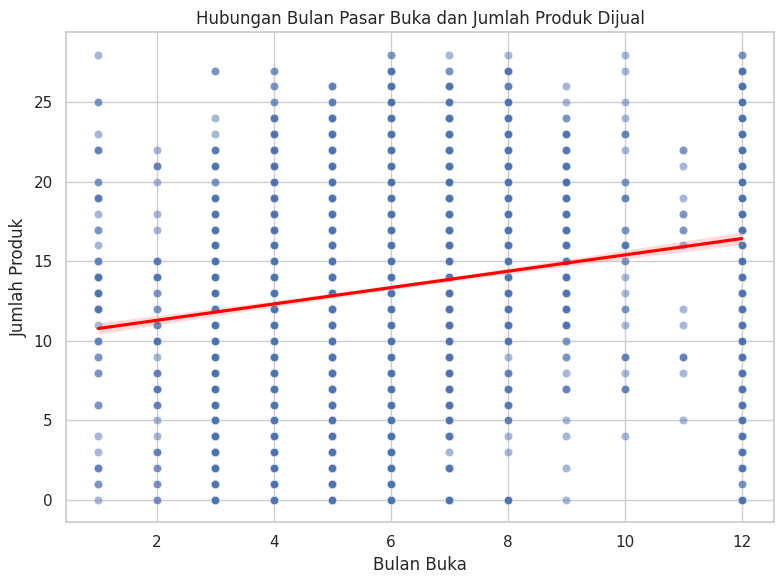

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='months_open', y='num_items_sold', alpha=0.5)
sns.regplot(data=df, x='months_open', y='num_items_sold', scatter=False, color='red')
plt.title('Hubungan Bulan Pasar Buka dan Jumlah Produk Dijual')
plt.xlabel('Bulan Buka')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

<ipython-input-9-1ffa9f30248e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette="magma")


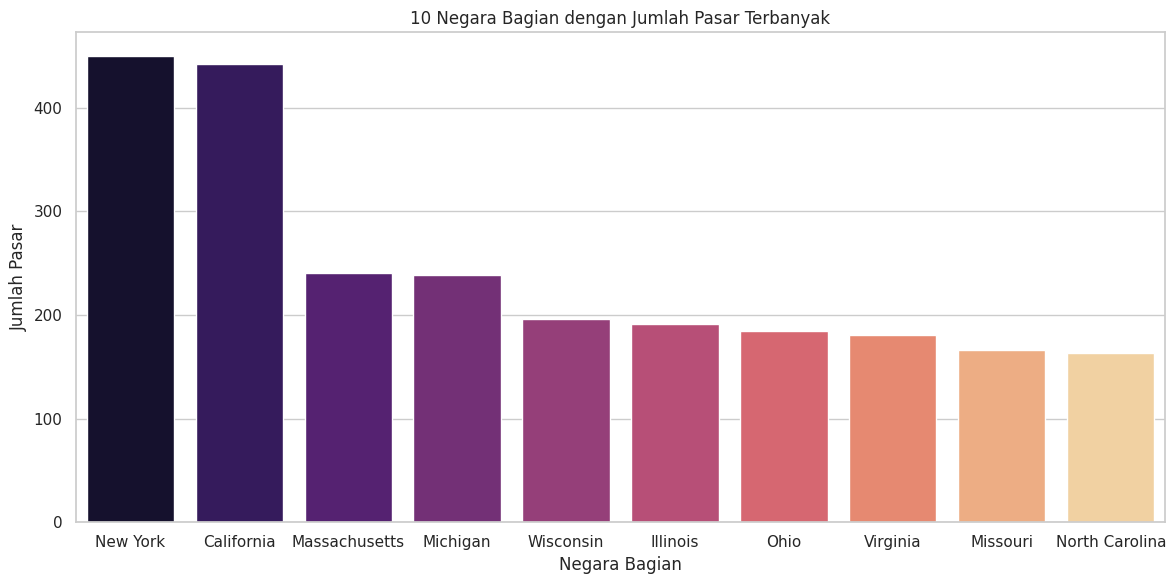

In [9]:
state_counts = df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette="magma")
plt.title('10 Negara Bagian dengan Jumlah Pasar Terbanyak')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pasar')
plt.tight_layout()
plt.show()

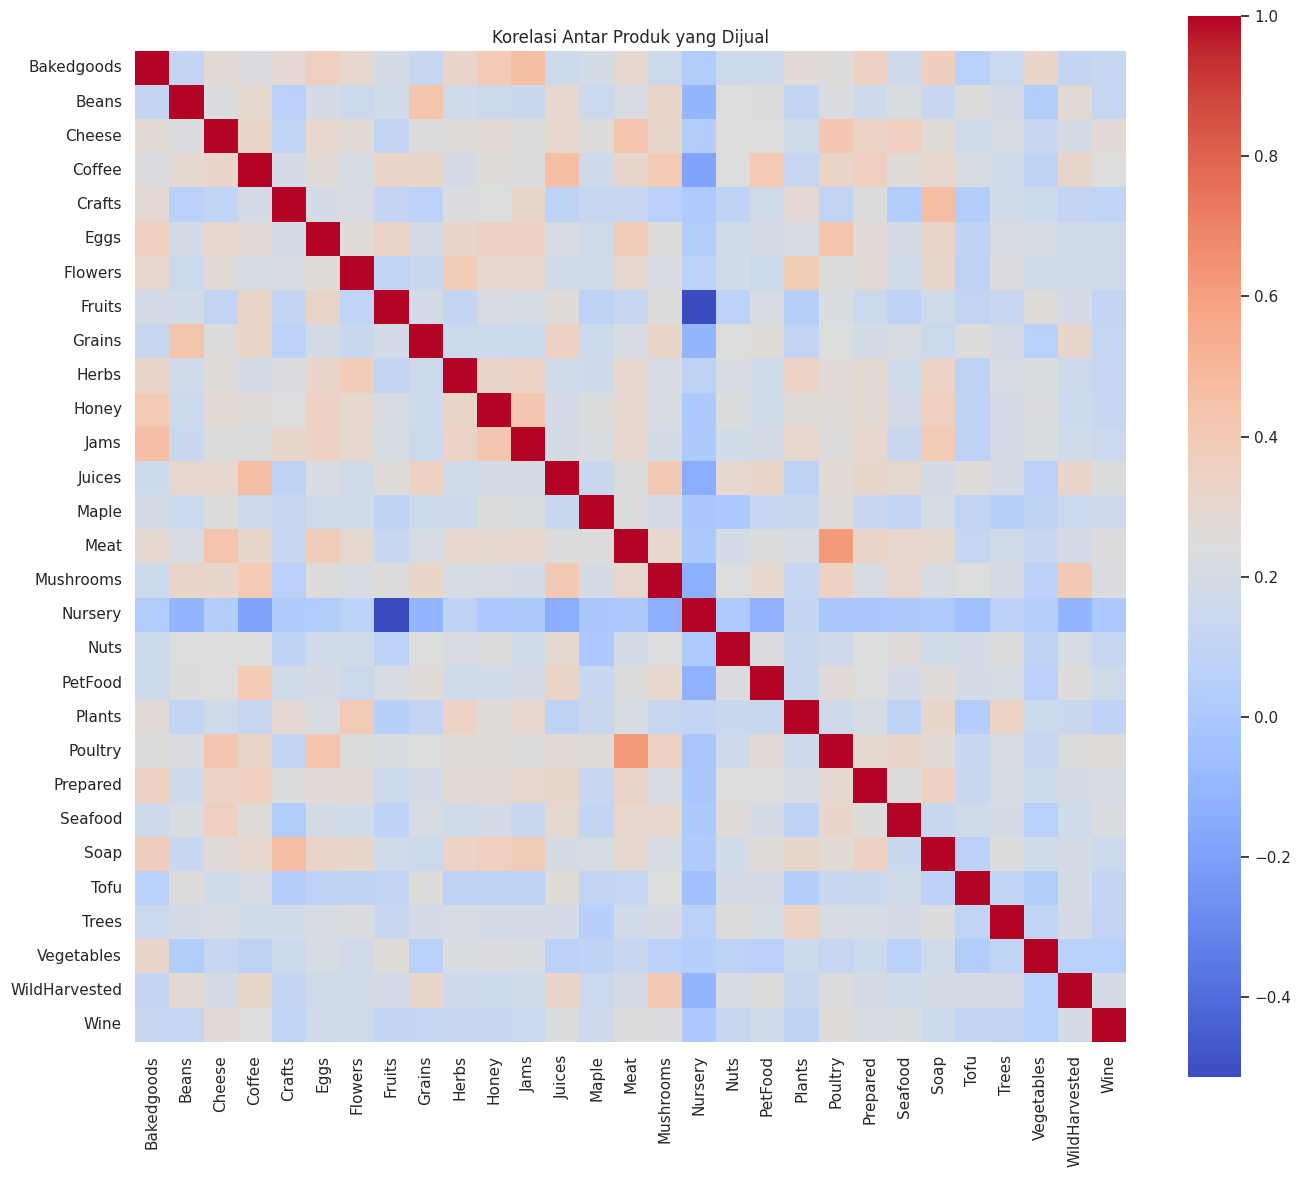

In [10]:
product_cols = df.columns[8:37]
product_data = df[product_cols]

correlation_matrix = product_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, square=True)
plt.title('Korelasi Antar Produk yang Dijual')
plt.tight_layout()
plt.show()


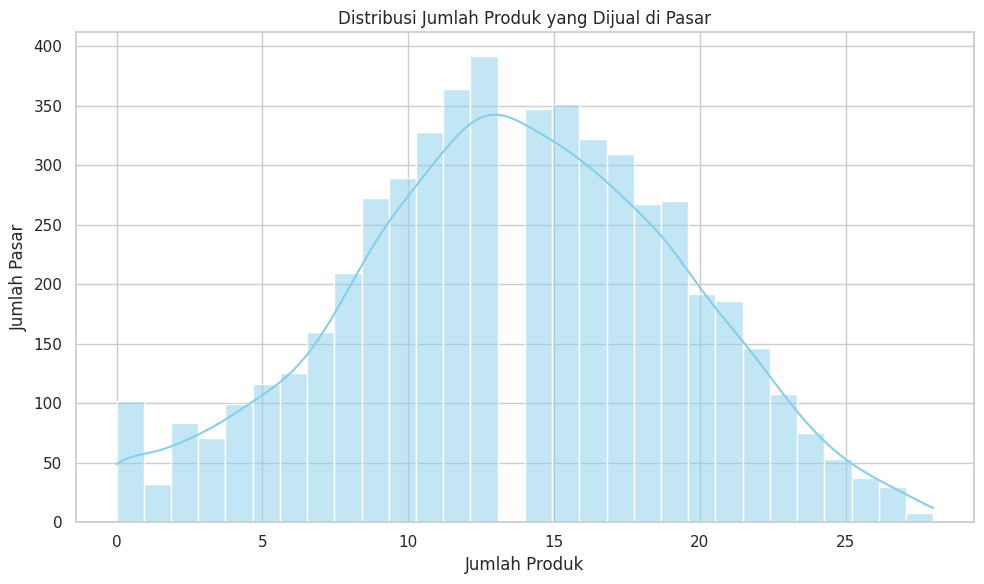

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_items_sold'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Produk yang Dijual di Pasar')
plt.xlabel('Jumlah Produk')
plt.ylabel('Jumlah Pasar')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import folium

df = pd.read_csv('markets_cleaned.csv')

# Perbaiki county
df['county'] = df['county'].str.strip().str.title()

# Perbaiki nama kolom koordinat
df.rename(columns={'lat': 'lon', 'lon': 'lat'}, inplace=True)

# Hitung jumlah pasar per county
market_count_by_county = df['county'].value_counts().reset_index()
market_count_by_county.columns = ['county', 'market_count']

# Ambil koordinat rata-rata per county
county_coords = df.groupby('county')[['lat', 'lon']].mean().reset_index()

# Gabungkan
county_map_data = pd.merge(market_count_by_county, county_coords, on='county', how='inner')

# Buat peta
heatmap_map = folium.Map(location=[27.994402, -81.760254], zoom_start=6)

# Tambahkan marker
for _, row in county_map_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['market_count'] * 2,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['county']}: {row['market_count']} markets"
    ).add_to(heatmap_map)

heatmap_map

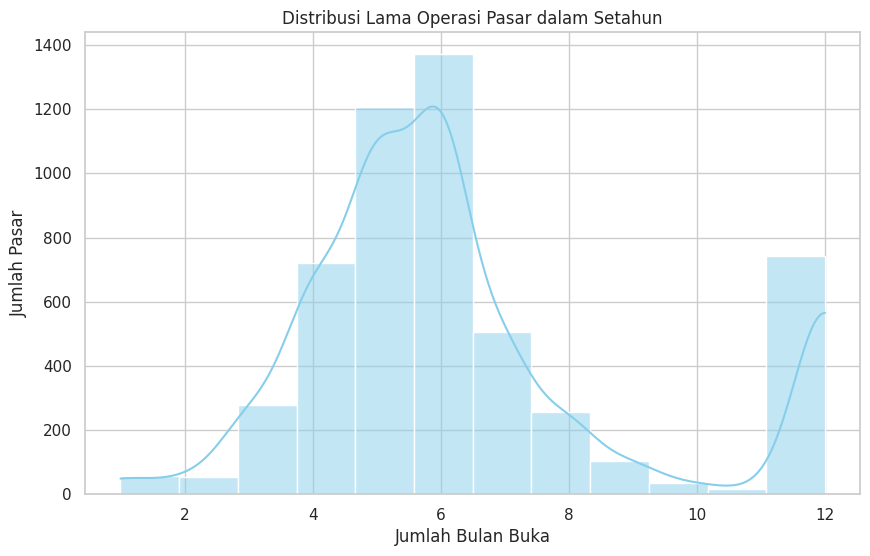

In [21]:
sns.histplot(df['months_open'], bins=12, kde=True, color='skyblue')
plt.title('Distribusi Lama Operasi Pasar dalam Setahun')
plt.xlabel('Jumlah Bulan Buka')
plt.ylabel('Jumlah Pasar')
plt.show()


### **Wawasan Menarik dari Data**

1. **Produk Paling Populer di Pasar Petani**

   * Dari grafik batang produk, terlihat bahwa ada produk tertentu yang secara konsisten ditawarkan di banyak pasar petani, misalnya **buah-buahan segar, sayuran, dan roti**.
   * Ini menunjukkan bahwa produk-produk segar dan kebutuhan pokok menjadi komoditas utama.

2. **Hubungan Antara Jumlah Bulan Pasar Buka dan Banyaknya Produk**

   * Visualisasi scatter plot dengan regresi menunjukkan ada **korelasi positif** antara lamanya pasar beroperasi (jumlah bulan buka) dengan jumlah produk yang ditawarkan.
   * Semakin lama pasar buka dalam setahun, umumnya semakin banyak jenis produk yang dijual. Hal ini masuk akal karena pasar yang lebih aktif cenderung memiliki lebih banyak pedagang dan variasi produk.

3. **Distribusi Pasar Berdasarkan Negara Bagian**

   * Negara bagian dengan jumlah pasar petani terbanyak bisa menjadi indikator **kebijakan lokal yang mendukung pertanian lokal** atau tingginya permintaan masyarakat terhadap produk segar dan lokal.

4. **Korelasi antar Produk**

   * Dari heatmap korelasi antar produk, kita bisa melihat produk-produk yang cenderung dijual bersama. Misalnya, sayuran dan buah-buahan mungkin memiliki korelasi tinggi, yang bisa digunakan untuk menyusun **strategi bundling atau penempatan produk** di pasar.


### **Kesimpulan**

Berdasarkan analisis dan visualisasi data pasar petani:

* Pasar petani memainkan peran penting dalam menyediakan produk segar kepada masyarakat, dengan fokus utama pada buah, sayur, dan roti.
* Pasar yang beroperasi lebih lama dalam setahun cenderung menawarkan lebih banyak jenis produk, menandakan **hubungan antara frekuensi operasional dan keragaman produk**.
* Negara bagian dengan banyak pasar petani dapat menjadi contoh praktik baik dalam mendukung pertanian lokal.
* Korelasi antar produk yang dijual memberikan peluang untuk **meningkatkan strategi pemasaran dan tata letak pasar**.
